In [49]:
import yfinance as yf
import pandas as pd
from datetime import datetime, date
from dateutil.relativedelta import relativedelta
import time

In [50]:
stocks = pd.read_excel("Planilha de Ouro Stocks - Fevereiro 2025.xlsx")
reits = pd.read_excel("Planilha de Ouro REITs - Fevereiro 2025.xlsx")

In [51]:
import pandas as pd

def filter_stocks(stocks: pd.DataFrame) -> list:
    """
    Filtra o DataFrame de stocks com base nos critérios especificados e retorna uma lista de tickers que atendem a todas as condições.
    Imprime o número de stocks que atendem aos critérios.

    Critérios:
    - Anos sem prejuízo >= 14
    - CAGR do LPA em 5 anos >= 0.10
    - Dívida Líquida/EBITDA <= 5.0
    - ROE >= 0.10
    - ROIC >= 0.04
    - Margem Líquida >= 0.07
    - Margem EBIT >= 0.07
    - Anos desde o IPO >= 14
    - Índice de Sharpe >= 0.5

    Args:
        stocks (pd.DataFrame): DataFrame contendo dados das ações.

    Returns:
        list: Lista de tickers que atendem aos critérios.
    """
    # Aplicar os filtros
    filtered_stocks = stocks[
        (stocks['Anos sem prejuízo'] >= 14) &
        (stocks['CAGR do LPA em 5 anos'] >= 0.10) &
        (stocks['Dívida Líquida/EBITDA'] <= 5.0) &
        (stocks['ROE'] >= 0.10) &
        (stocks['ROIC'] >= 0.04) &
        (stocks['Margem Líquida'] >= 0.07) &
        (stocks['Margem EBIT'] >= 0.07) &
        (stocks['Anos desde o IPO'] >= 14) &
        (stocks['Índice de Sharpe'] >= 0.5)
    ]
    
    # Contar o número de stocks filtrados
    count = len(filtered_stocks)
    
    # Imprimir o número de stocks filtrados
    print(f"Number of stocks that meet the criteria: {count}")
    
    # Retornar a lista de tickers
    return filtered_stocks['Ticker'].tolist()

def filter_reits(reits: pd.DataFrame) -> list:
    """
    Filtra o DataFrame de REITs com base nos critérios especificados e retorna uma lista de tickers que atendem a todas as condições.
    Imprime o número de REITs que atendem aos critérios.

    Critérios:
    - Anos sem prejuízo >= 10
    - CAGR do LPA em 5 anos >= 0.04
    - Dívida Líquida/EBITDA <= 6.5
    - ROE >= 0.05
    - Margem Líquida >= 0.10
    - Margem EBIT >= 0.10
    - Anos desde o IPO >= 10

    Args:
        reits (pd.DataFrame): DataFrame contendo dados dos REITs.

    Returns:
        list: Lista de tickers que atendem aos critérios.
    """
    # Aplicar os filtros
    filtered_reits = reits[
        (reits['Anos sem prejuízo'] >= 10) &
        (reits['CAGR do LPA em 5 anos'] >= 0.04) &
        (reits['Dívida Líquida/EBITDA'] <= 6.5) &
        (reits['ROE'] >= 0.05) &
        (reits['Margem Líquida'] >= 0.10) &
        (reits['Margem EBIT'] >= 0.10) &
        (reits['Anos desde o IPO'] >= 10)
    ]
    
    # Contar o número de REITs filtrados
    count = len(filtered_reits)
    
    # Imprimir o número de REITs filtrados
    print(f"Number of REITs that meet the criteria: {count}")
    
    # Retornar a lista de tickers
    return filtered_reits['Ticker'].tolist()

In [52]:
filtered_stocks_list = filter_stocks(stocks)
filtered_reits_list = filter_reits(reits)
print("Stocks filtradas:", filtered_stocks_list)
print("REITs filtradas:", filtered_reits_list)

Number of stocks that meet the criteria: 74
Number of REITs that meet the criteria: 17
Stocks filtradas: ['WSO', 'WSM', 'WM', 'WAB', 'VRSK', 'VMI', 'V', 'USLM', 'URI', 'ULH', 'UFPT', 'TXRH', 'TSCO', 'TRMB', 'TOL', 'TMUS', 'TJX', 'TGNA', 'SYK', 'SSNC', 'SHW', 'SCI', 'SCCO', 'RSG', 'RPM', 'ROL', 'RMD', 'RJF', 'PH', 'NVDA', 'NFLX', 'MPWR', 'MORN', 'MMC', 'MLI', 'MCRI', 'MATX', 'MA', 'LPLA', 'LMAT', 'LII', 'KLAC', 'KAI', 'IT', 'ISRG', 'INGR', 'IDCC', 'IBKR', 'HUBB', 'GWW', 'GOOGL', 'FTNT', 'FI', 'EXLS', 'ETN', 'DVA', 'DOV', 'DORM', 'DKS', 'DE', 'CSL', 'CPRT', 'CMG', 'CME', 'CBZ', 'BRO', 'BMI', 'AYI', 'APH', 'APD', 'AMG', 'ACIW', 'AAPL', 'AAON']
REITs filtradas: ['PLD', 'EQIX', 'AVB', 'PSA', 'WPC', 'REG', 'MAA', 'ESS', 'CPT', 'GLPI', 'EGP', 'CUBE', 'FR', 'RYN', 'ELS', 'LAMR', 'OLP']


In [53]:
def fetch_fundamental_data(tickers):
    fundamental_data = []
    seen_tickers = set()  # Track processed tickers
    for ticker in tickers:
        if ticker in seen_tickers:
            continue  # Skip duplicates
        try:
            ticker_obj = yf.Ticker(ticker)
            info = ticker_obj.info
            data = {
                'Ticker': ticker,
                'Company Name': info.get('longName', 'N/A'),
                'Sector': info.get('sector', 'N/A'),
                'Market Cap (B)': info.get('marketCap', 'N/A'),
                'P/E Ratio': info.get('trailingPE', 'N/A'),
                'Dividend Yield (%)': info.get('dividendYield', 'N/A'),
            }
            fundamental_data.append(data)
            seen_tickers.add(ticker)
        except Exception as e:
            print(f"Error fetching fundamental data for {ticker}: {e}")
    return pd.DataFrame(fundamental_data)

In [54]:
def fetch_historical_data(tickers, start_date, end_date):
    """Fetch historical data in batches to avoid API overload."""
    batch_size = 50
    all_data = []
    unique_tickers = list(dict.fromkeys(tickers))  # Preserve order, remove duplicates
    
    for i in range(0, len(unique_tickers), batch_size):
        batch = unique_tickers[i:i + batch_size]
        print(f"Fetching batch: {batch}")
        for attempt in range(3):
            try:
                data = yf.download(batch, start=start_date, end=end_date, 
                                 auto_adjust=False, progress=False)
                if isinstance(data.columns, pd.MultiIndex):
                    if 'Adj Close' not in data.columns.levels[0]:
                        raise KeyError("'Adj Close' not found in MultiIndex levels!")
                    data = data['Adj Close']
                elif 'Adj Close' not in data.columns:
                    raise KeyError("'Adj Close' not found in flat columns!")
                all_data.append(data)
                break
            except Exception as e:
                print(f"Attempt {attempt + 1} for batch {batch} failed: {e}. Retrying in 5 seconds...")
                time.sleep(5)
        else:
            print(f"Failed to fetch data for batch {batch} after 3 attempts.")
    if not all_data:
        raise ValueError("No historical data retrieved!")
    combined_data = pd.concat(all_data, axis=1)
    # Drop duplicate columns if any (e.g., from ticker mapping overlap)
    combined_data = combined_data.loc[:, ~combined_data.columns.duplicated()]
    return combined_data

def verify_performance_and_fundamentals(filtered_stocks, filtered_reits):
    ticker_mapping = {'LEN.B': 'LEN', 'WSO.B': 'WSO'}
    filtered_stocks = list(dict.fromkeys([ticker_mapping.get(t, t) for t in filtered_stocks]))
    filtered_reits = list(dict.fromkeys([ticker_mapping.get(t, t) for t in filtered_reits]))
    
    all_tickers = list(dict.fromkeys(filtered_stocks + filtered_reits))
    tickers_with_sp = list(dict.fromkeys(all_tickers + ['^GSPC']))
    
    end_date = date.today()
    start_date = end_date - relativedelta(years=20)
    print(f"Fetching data from {start_date} to {end_date}")
    
    data = fetch_historical_data(tickers_with_sp, start_date, end_date)
    
    print(f"Columns in historical data: {data.columns.tolist()}")
    if '^GSPC' not in data.columns:
        raise ValueError("S&P 500 (^GSPC) data not included in historical data.")
    
    time_frames = [1, 3, 5, 10, 15, 20]
    return_df = pd.DataFrame(index=data.columns)
    end_date = data.index[-1]
    print(f"Last available date: {end_date}")
    for N in time_frames:
        start_date_N = end_date - relativedelta(years=N)
        start_prices = data.asof(start_date_N)
        end_prices = data.iloc[-1]
        return_Ny = (end_prices / start_prices) - 1
        return_df[f'{N}Y Return'] = return_Ny
    
    fundamental_df = fetch_fundamental_data(all_tickers)
    fundamental_df['Type'] = fundamental_df['Ticker'].apply(
        lambda x: 'Stock' if x in filtered_stocks else 'REIT'
    )
    
    fundamental_df['Market Cap (B)'] = fundamental_df['Market Cap (B)'].apply(
        lambda x: x / 1e9 if isinstance(x, (int, float)) and not pd.isna(x) else x
    )
    
    return_df = return_df.reset_index().rename(columns={'index': 'Ticker'})
    
    final_df = pd.merge(
        fundamental_df,
        return_df[return_df['Ticker'].isin(all_tickers)],
        on='Ticker'
    ).drop_duplicates(subset=['Ticker'])
    
    # Extract and format S&P 500 returns as percentage strings
    sp_data = return_df[return_df['Ticker'] == '^GSPC']
    if sp_data.empty:
        print("Warning: S&P 500 data (^GSPC) not found in historical data.")
        sp_returns = pd.Series(index=[f"{n}Y Return" for n in time_frames], data=['N/A'] * len(time_frames))
    else:
        sp_returns = sp_data.iloc[0, 1:].apply(
            lambda x: f"{x * 100:.2f}%" if not pd.isna(x) else 'N/A'
        )
    
    # Format final DataFrame
    for col in [f'{n}Y Return' for n in time_frames]:
        final_df[col] = final_df[col].apply(lambda x: f"{x * 100:.2f}%" if not pd.isna(x) else 'N/A')
    final_df['Market Cap (B)'] = final_df['Market Cap (B)'].apply(
        lambda x: f"{x:.2f}" if isinstance(x, (int, float)) and not pd.isna(x) else 'N/A'
    )
    
    # Display S&P 500 returns (already formatted)
    print("S&P 500 Returns:")
    for col, value in sp_returns.items():
        print(f"{col:<12}: {value}")
    
    print("\nFundamental and Performance Data:")
    print(final_df.to_string(index=False))
    
    return final_df, sp_returns, data

In [55]:
# Call the function
final_df, sp_returns, historical_data = verify_performance_and_fundamentals(
    filtered_stocks_list, filtered_reits_list
)



Fetching data from 2005-03-01 to 2025-03-01
Fetching batch: ['WSO', 'WSM', 'WM', 'WAB', 'VRSK', 'VMI', 'V', 'USLM', 'URI', 'ULH', 'UFPT', 'TXRH', 'TSCO', 'TRMB', 'TOL', 'TMUS', 'TJX', 'TGNA', 'SYK', 'SSNC', 'SHW', 'SCI', 'SCCO', 'RSG', 'RPM', 'ROL', 'RMD', 'RJF', 'PH', 'NVDA', 'NFLX', 'MPWR', 'MORN', 'MMC', 'MLI', 'MCRI', 'MATX', 'MA', 'LPLA', 'LMAT', 'LII', 'KLAC', 'KAI', 'IT', 'ISRG', 'INGR', 'IDCC', 'IBKR', 'HUBB', 'GWW']
Fetching batch: ['GOOGL', 'FTNT', 'FI', 'EXLS', 'ETN', 'DVA', 'DOV', 'DORM', 'DKS', 'DE', 'CSL', 'CPRT', 'CMG', 'CME', 'CBZ', 'BRO', 'BMI', 'AYI', 'APH', 'APD', 'AMG', 'ACIW', 'AAPL', 'AAON', 'PLD', 'EQIX', 'AVB', 'PSA', 'WPC', 'REG', 'MAA', 'ESS', 'CPT', 'GLPI', 'EGP', 'CUBE', 'FR', 'RYN', 'ELS', 'LAMR', 'OLP', '^GSPC']
Columns in historical data: ['GWW', 'HUBB', 'IBKR', 'IDCC', 'INGR', 'ISRG', 'IT', 'KAI', 'KLAC', 'LII', 'LMAT', 'LPLA', 'MA', 'MATX', 'MCRI', 'MLI', 'MMC', 'MORN', 'MPWR', 'NFLX', 'NVDA', 'PH', 'RJF', 'RMD', 'ROL', 'RPM', 'RSG', 'SCCO', 'SCI', 'SHW

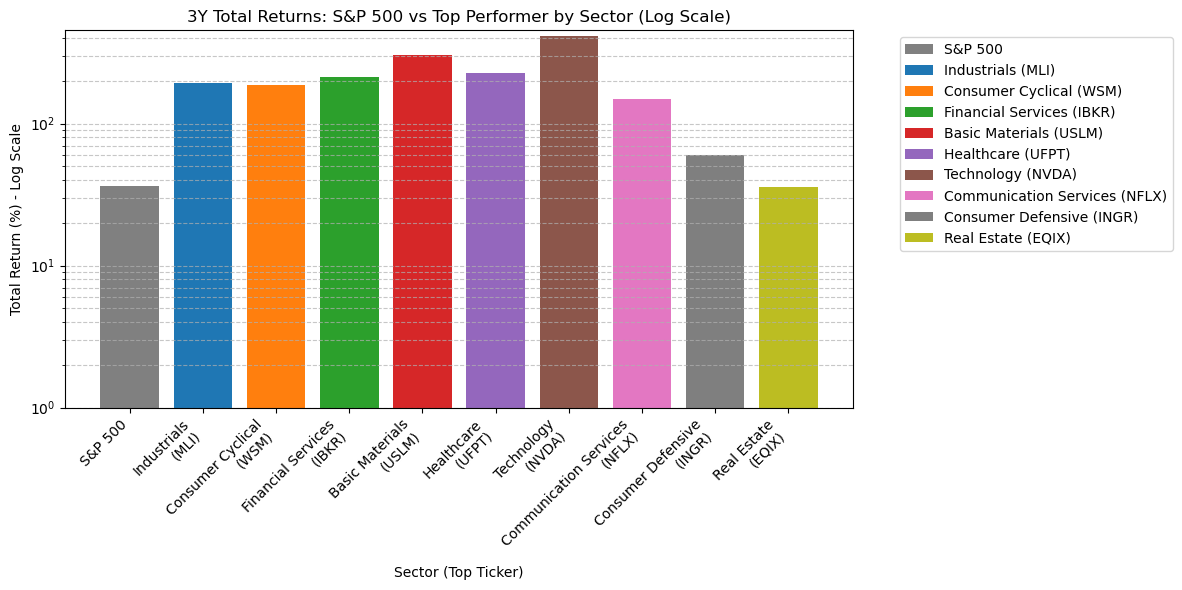

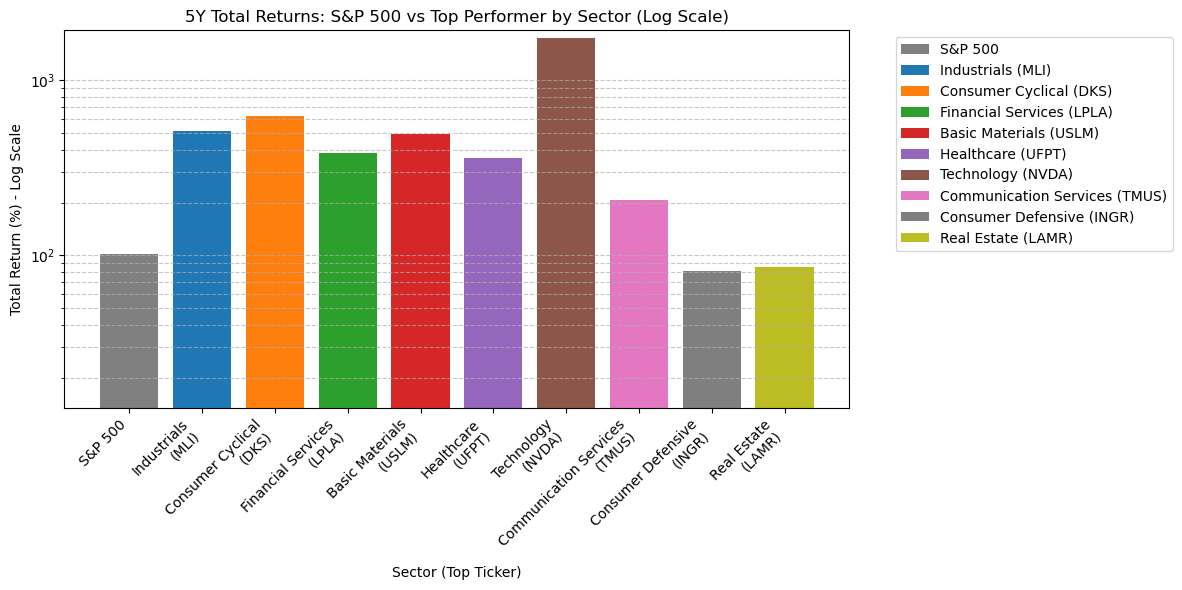

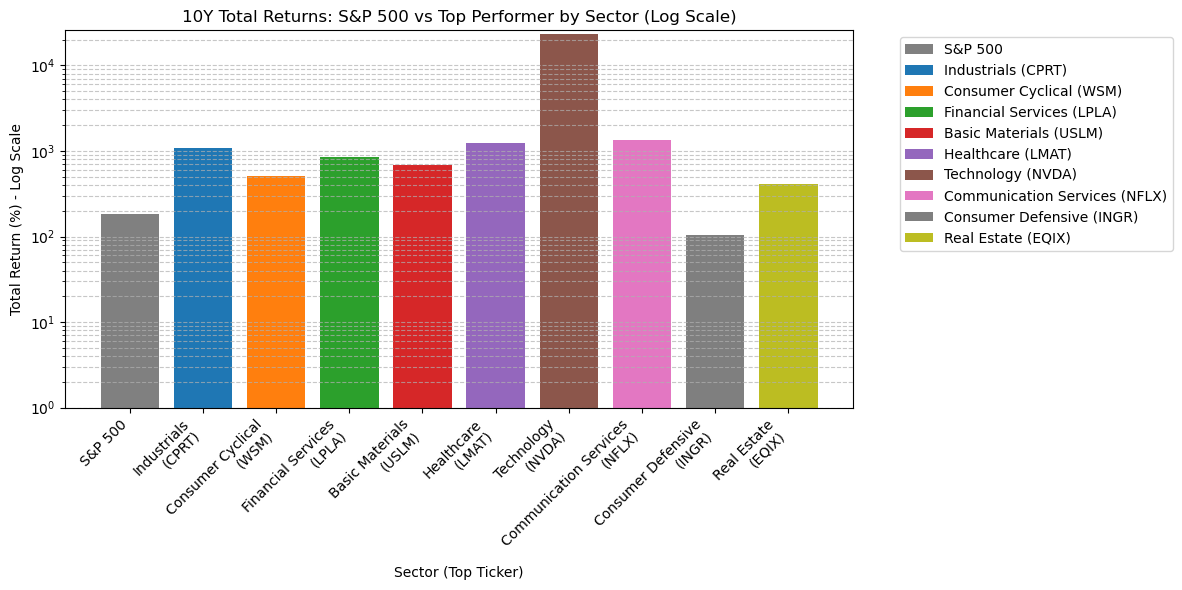

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming final_df and sp_returns are available from your previous run

# Convert percentage strings back to floats for plotting
def parse_percent(x):
    return float(x.strip('%')) if isinstance(x, str) and x != 'N/A' else None

# Prepare data
for col in ['3Y Return', '5Y Return', '10Y Return']:
    final_df[col] = final_df[col].apply(parse_percent)

sp_returns_numeric = sp_returns.apply(parse_percent)

# Define time frames and corresponding S&P 500 returns
time_frames = {'3Y': '3Y Return', '5Y': '5Y Return', '10Y': '10Y Return'}
sp_values = {
    '3Y': sp_returns_numeric['3Y Return'],
    '5Y': sp_returns_numeric['5Y Return'],
    '10Y': sp_returns_numeric['10Y Return']
}

# Get unique sectors (excluding 'N/A' if present)
sectors = final_df['Sector'].replace('N/A', pd.NA).dropna().unique()

# Function to get top performer per sector
def get_top_performer(df, sector, return_col):
    sector_df = df[df['Sector'] == sector]
    if sector_df.empty or sector_df[return_col].isna().all():  # Check for all NaN
        return None, None
    # Ensure there’s at least one non-NaN value
    if sector_df[return_col].count() == 0:
        return None, None
    top_row = sector_df.loc[sector_df[return_col].idxmax()]
    return top_row['Ticker'], top_row[return_col]

# Helper function to set reasonable log scale limits
def custom_ylim(min_val, max_val):
    # Ensure min_val is positive for log scale (default to 1% if too small)
    min_val = max(min_val, 1) if min_val > 0 else 1
    # Add some padding to max_val
    max_val = max_val * 1.1
    return min_val, max_val

# Create graphs with logarithmic y-axis
for period, return_col in time_frames.items():
    plt.figure(figsize=(12, 6))
    
    # S&P 500 bar
    sp_return = sp_values[period]
    if sp_return is not None:  # Ensure S&P return is valid
        plt.bar('S&P 500', sp_return, color='gray', label='S&P 500')
    
    # Top performer per sector
    top_data = []
    for sector in sectors:
        ticker, performance = get_top_performer(final_df, sector, return_col)
        if ticker and performance is not None:
            top_data.append((sector, ticker, performance))
    
    # Plot bars for each sector's top performer
    for sector, ticker, performance in top_data:
        plt.bar(f"{sector}\n({ticker})", performance, label=f"{sector} ({ticker})")
    
    # Customize plot with logarithmic y-axis
    plt.yscale('log')
    plt.title(f"{period} Total Returns: S&P 500 vs Top Performer by Sector (Log Scale)")
    plt.xlabel("Sector (Top Ticker)")
    plt.ylabel("Total Return (%) - Log Scale")
    plt.xticks(rotation=45, ha='right')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(axis='y', linestyle='--', alpha=0.7, which='both')
    
    # Set reasonable y-axis limits (avoid zero or negative)
    valid_returns = final_df[return_col].dropna()
    if not valid_returns.empty:
        plt.ylim(custom_ylim(valid_returns.min(), valid_returns.max()))
    else:
        plt.ylim(1, 1000)  # Default range if no valid data
    
    plt.tight_layout()
    plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


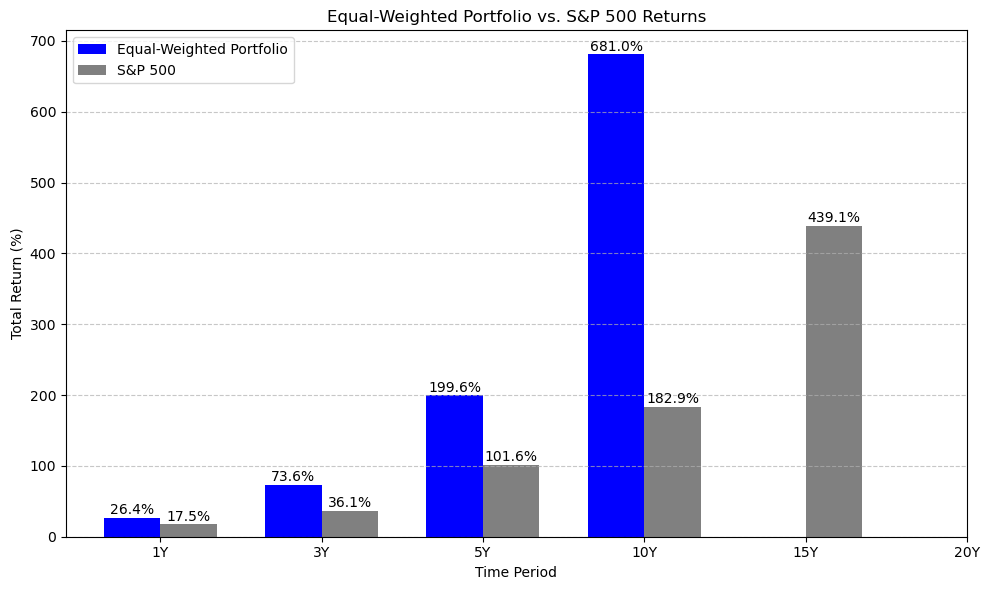

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from dateutil.relativedelta import relativedelta
import numpy as np

def compare_equal_weight_portfolio(final_df, historical_data):
    """
    Compare an equal-weighted portfolio of all stocks in final_df against the S&P 500
    across 1, 3, 5, 10, 15, and 20-year periods.

    Args:
        final_df (pd.DataFrame): DataFrame with stock/REIT data from verify_performance_and_fundamentals.
        historical_data (pd.DataFrame): Historical adjusted close prices from yfinance.

    Returns:
        None: Displays a bar graph comparing portfolio and S&P 500 returns.
    """
    # Extract tickers from final_df (excludes ^GSPC)
    portfolio_tickers = final_df['Ticker'].tolist()
    
    # Ensure historical_data includes all tickers and ^GSPC
    if '^GSPC' not in historical_data.columns:
        raise ValueError("S&P 500 (^GSPC) data not found in historical_data.")
    
    # Filter historical data for portfolio tickers and S&P 500
    portfolio_data = historical_data[portfolio_tickers].dropna(how='all')
    sp500_data = historical_data['^GSPC'].dropna()
    
    # Calculate daily returns
    portfolio_daily_returns = portfolio_data.pct_change()
    sp500_daily_returns = sp500_data.pct_change()
    
    # Calculate equal-weighted portfolio daily returns (mean across tickers)
    equal_weight_returns = portfolio_daily_returns.mean(axis=1)
    
    # Define time periods
    time_frames = [1, 3, 5, 10, 15, 20]
    periods = [f"{n}Y" for n in time_frames]
    
    # Calculate total returns for each period
    portfolio_returns = []
    sp500_returns = []
    end_date = historical_data.index[-1]
    
    for years in time_frames:
        start_date = end_date - relativedelta(years=years)
        
        # Portfolio total return
        start_prices = portfolio_data.asof(start_date)
        end_prices = portfolio_data.iloc[-1]
        if start_prices.notna().sum() > 0:  # Ensure some data exists
            portfolio_return = (end_prices / start_prices).mean() - 1  # Equal-weighted
            portfolio_returns.append(portfolio_return * 100 if not pd.isna(portfolio_return) else None)
        else:
            portfolio_returns.append(None)
        
        # S&P 500 total return
        sp_start_price = sp500_data.asof(start_date)
        sp_end_price = sp500_data.iloc[-1]
        sp_return = (sp_end_price / sp_start_price) - 1
        sp500_returns.append(sp_return * 100 if not pd.isna(sp_return) else None)
    
    # Create DataFrame for plotting
    returns_df = pd.DataFrame({
        'Period': periods,
        'Equal-Weighted Portfolio': portfolio_returns,
        'S&P 500': sp500_returns
    }).set_index('Period')
    
    # Plotting
    fig, ax = plt.subplots(figsize=(10, 6))
    bar_width = 0.35
    index = range(len(periods))
    
    plt.bar(index, returns_df['Equal-Weighted Portfolio'], bar_width, label='Equal-Weighted Portfolio', color='blue')
    plt.bar([i + bar_width for i in index], returns_df['S&P 500'], bar_width, label='S&P 500', color='gray')
    
    plt.xlabel('Time Period')
    plt.ylabel('Total Return (%)')
    plt.title('Equal-Weighted Portfolio vs. S&P 500 Returns')
    plt.xticks([i + bar_width / 2 for i in index], periods)
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Add value labels on top of bars
    for i, period in enumerate(periods):
        port_val = returns_df['Equal-Weighted Portfolio'][period]
        sp_val = returns_df['S&P 500'][period]
        if port_val is not None:
            plt.text(i, port_val + 1, f"{port_val:.1f}%", ha='center', va='bottom')
        if sp_val is not None:
            plt.text(i + bar_width, sp_val + 1, f"{sp_val:.1f}%", ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

# Assuming final_df and historical_data are from your previous run of verify_performance_and_fundamentals
# Example call (uncomment and adjust if needed):
# final_df, sp_returns, historical_data = verify_performance_and_fundamentals(filtered_stocks_list, filtered_reits_list)
# compare_equal_weight_portfolio(final_df, historical_data)

# If you already have final_df and historical_data in your environment, just run:
compare_equal_weight_portfolio(final_df, historical_data)